In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from scipy import stats
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

font = {'family' : 'sans-serif',
        'size'   : 16}

matplotlib.rc('font', **font)

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('customer_segmentation_data.csv')
df.head()

,CustID,Gender,Age,AnnualIncome,CustScore (1-100),Hometown,FavoriteTime
0,1,Female,20,20000,1,Jakarta,Weekend
1,2,Male,21,34000,81,Jakarta,Weekend
2,3,Female,18,12350,1,Jakarta,Weekend
3,4,Male,45,12000,1,Bandung,Weekday
4,5,Male,31,18000,10,Bandung,Weekend


First, I want to simplify our column names so we can access easily later.

In [3]:
df.columns = ['cust_id','gender','age','annual_income','cust_score','hometown','favorite_time']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   cust_id        200 non-null    int64 
 1   gender         200 non-null    object
 2   age            200 non-null    int64 
 3   annual_income  200 non-null    int64 
 4   cust_score     200 non-null    int64 
 5   hometown       200 non-null    object
 6   favorite_time  200 non-null    object
dtypes: int64(4), object(3)
memory usage: 11.1+ KB


Fortunately, there is no any NULL value in our data set.

As we can see that we have 3 numerical variables, 3 categorical variables, and 1 unique values column.

In [5]:
df.nunique()

cust_id          200
gender             2
age               50
annual_income     94
cust_score        81
hometown           7
favorite_time      2
dtype: int64

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cust_id,200.0,100.500,57.879185,1.0,50.75,100.5,150.25,200.0
age,200.0,39.415,13.956241,18.0,30.00,36.0,49.00,75.0
annual_income,200.0,44234.100,21477.387318,10000.0,24545.00,45000.0,60000.00,90000.0
cust_score,200.0,46.915,28.979941,1.0,22.00,46.0,69.00,100.0


# Exploring The Data

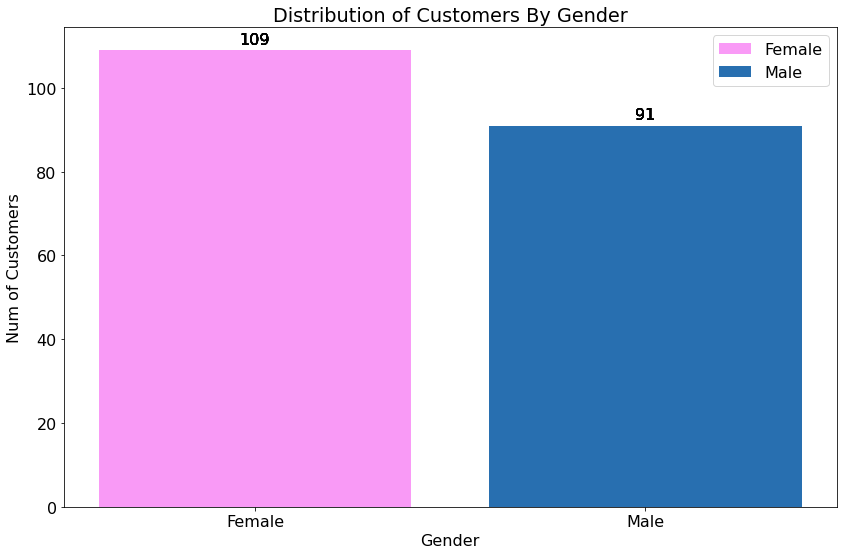

In [7]:
fig, ax = plt.subplots(figsize=(12,8))

rects1 = ax.bar([0], list(df[df['gender']=='Female'].count()), label='Female', color ='#f99af6')
rects2 = ax.bar([1], list(df[df['gender']=='Male'].count()), label='Male', color = '#286fb0')

ax.set_title('Distribution of Customers By Gender')
ax.set_ylabel('Num of Customers')
ax.set_xlabel('Gender')
ax.set_xticks([0,1])
ax.set_xticklabels(['Female','Male'])
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()



There are slightly more female than male in this data set. Maybe itu could be a significant element in our customer segmentation later.

What about age?

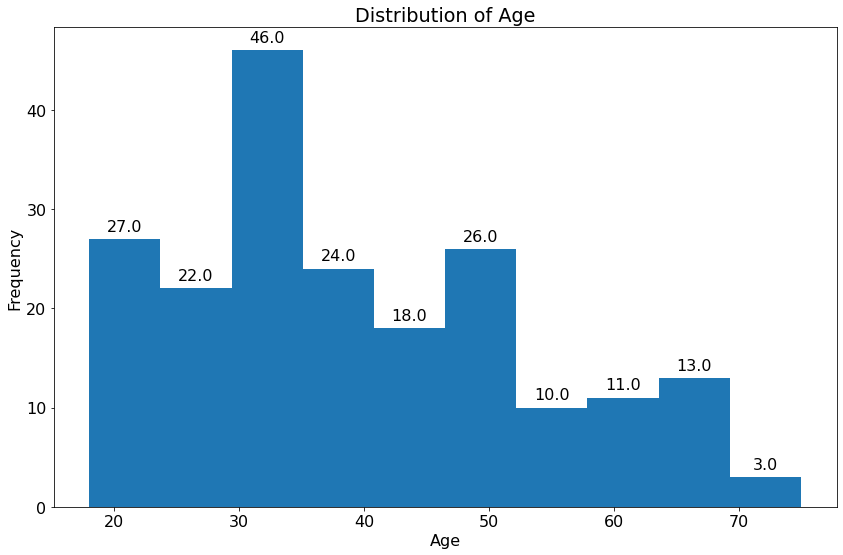

In [8]:
fig, ax = plt.subplots(figsize=(12,8))

n, bar_labelins, patches = ax.hist(df['age'])

ax.set_title('Distribution of Age')
ax.set_ylabel('Frequency')
ax.set_xlabel('Age')

for rect in patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    
    space  = 5
    va = 'bottom'
    label = str(np.round(y_value, 3))
    
    plt.annotate(
        label ,
        (x_value, y_value) ,
        xytext = (0, space) ,
        textcoords = 'offset points' ,
        ha = 'center' ,
        va=va
    )

fig.tight_layout()

plt.show()


The ages are mostly between 20 and 40. There ar less older customers, so the distribution is rigth-skewed because it has longer right tail. It shows us what our type of demographic looks like.

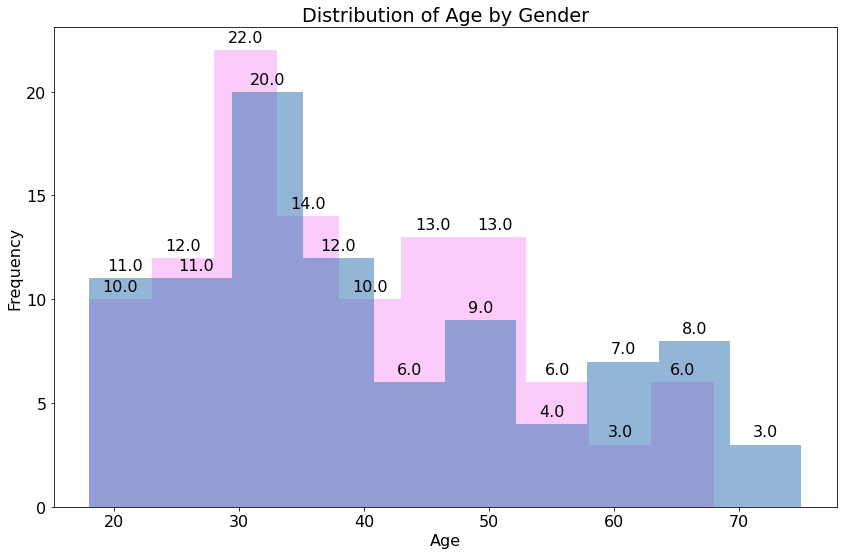

In [9]:
fig, ax = plt.subplots(figsize=(12,8))

nf, bar_labelins_f, patches_f = ax.hist(df[df['gender']=='Female']['age'], color = '#f99af6', label = 'Female', alpha = .5)
nm, bar_labelins_m, patches_m = ax.hist(df[df['gender']=='Male']['age'], color = '#286fb0', label = 'Male', alpha = .5)

ax.set_title('Distribution of Age by Gender')
ax.set_ylabel('Frequency')
ax.set_xlabel('Age')

for patches in [patches_f, patches_m]:
    for rect in patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space  = 5
        va = 'bottom'
        label = str(np.round(y_value, 3))

        plt.annotate(
            label ,
            (x_value, y_value) ,
            xytext = (0, space) ,
            textcoords = 'offset points' ,
            ha = 'center' ,
            va=va
        )

fig.tight_layout()

plt.show()

The distribution of age between Female and Male Customers are slightly same. As we can see the spike around the age 29 - 35 in both Female and Male Distributions. But there is a significant amount of senior Male in the 59 - 75 year old bucket.

What about income?

In [10]:
df.describe().transpose().loc['annual_income']

count      200.000000
mean     44234.100000
std      21477.387318
min      10000.000000
25%      24545.000000
50%      45000.000000
75%      60000.000000
max      90000.000000
Name: annual_income, dtype: float64

As we can see the range of annual income are between 10.000 and 90.000

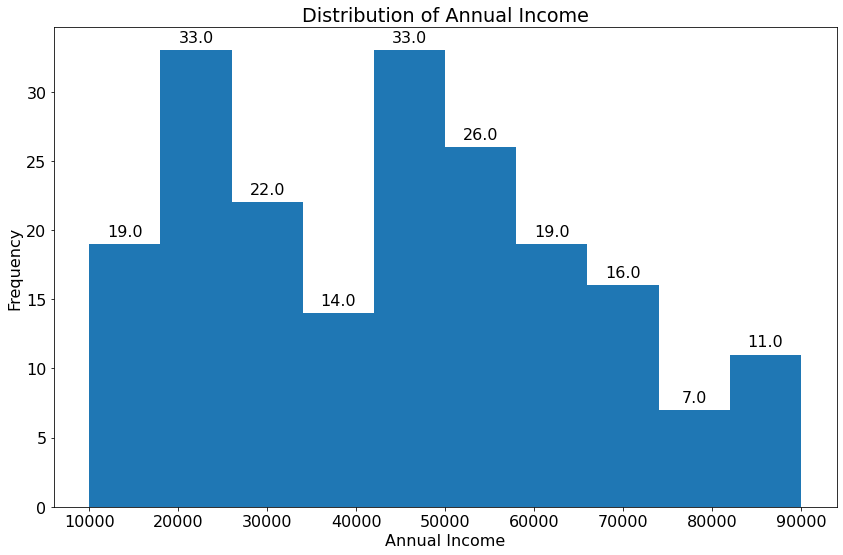

In [11]:
fig, ax = plt.subplots(figsize=(12,8))

n, bar_labelins, patches = ax.hist(df['annual_income'], )

ax.set_title('Distribution of Annual Income')
ax.set_ylabel('Frequency')
ax.set_xlabel('Annual Income')

for rect in patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    
    space  = 5
    va = 'bottom'
    label = str(np.round(y_value, 3))
    
    plt.annotate(
        label ,
        (x_value, y_value) ,
        xytext = (0, space) ,
        textcoords = 'offset points' ,
        ha = 'center' ,
        va=va
    )

fig.tight_layout()

plt.show()


Much of the income separate into two buckets, around 20,000 and around 45,000. Does the any other variables impact this?

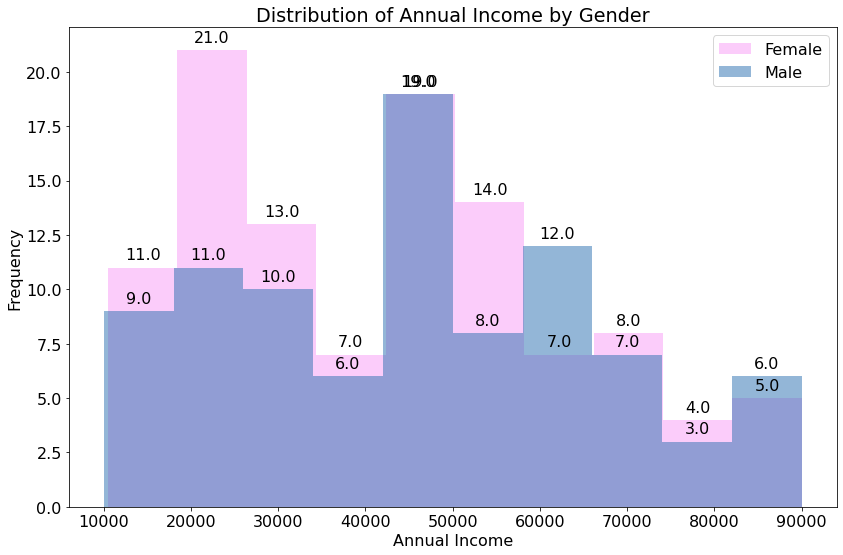

In [12]:
fig, ax = plt.subplots(figsize=(12,8))

nf, bar_labelins_f, patches_f = ax.hist(df[df['gender']=='Female']['annual_income'], color = '#f99af6', label = 'Female', alpha = .5)
nm, bar_labelins_m, patches_m = ax.hist(df[df['gender']=='Male']['annual_income'], color = '#286fb0', label = 'Male', alpha = .5)

ax.set_title('Distribution of Annual Income by Gender')
ax.set_ylabel('Frequency')
ax.set_xlabel('Annual Income')

for patches in [patches_f, patches_m]:
    for rect in patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space  = 5
        va = 'bottom'
        label = str(np.round(y_value, 3))

        plt.annotate(
            label ,
            (x_value, y_value) ,
            xytext = (0, space) ,
            textcoords = 'offset points' ,
            ha = 'center' ,
            va=va
        )

fig.tight_layout()

plt.legend()

plt.show()

In [13]:
df_income_gender = pd.DataFrame([df[df['gender']=='Female']['annual_income'],df[df['gender']=='Male']['annual_income']]).transpose()
df_income_gender.columns = ['female','male']
df_income_gender.describe()

,female,male
count,109.000000,91.000000
mean,42972.110092,45745.714286
std,21230.180783,21790.671916
min,10500.000000,10000.000000
25%,23700.000000,29000.000000
50%,43000.000000,45000.000000
75%,56000.000000,62000.000000
max,90000.000000,90000.000000


The distribution of Annual Income by Gender has no significance diffirence on both Female and Male Distributions. It is also showed at the mean and median of both Female Distribution and Male Distribution, which are similar on both median and mean.

But, eventhough the earnings of Female and Male are not different, are their spending also similar?

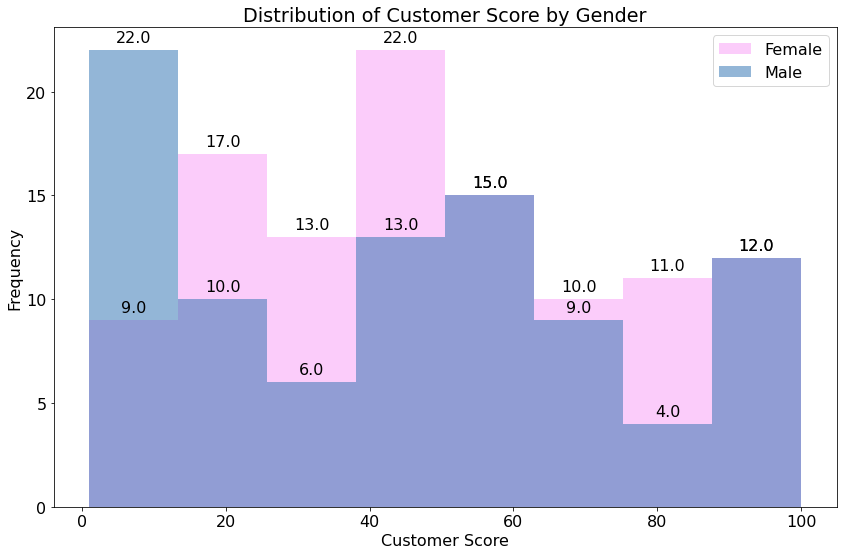

In [14]:
fig, ax = plt.subplots(figsize=(12,8))

nf, bar_labelins_f, patches_f = ax.hist(df[df['gender']=='Female']['cust_score'], bins= 8, color = '#f99af6', label = 'Female', alpha = .5)
nm, bar_labelins_m, patches_m = ax.hist(df[df['gender']=='Male']['cust_score'], bins = 8, color = '#286fb0', label = 'Male', alpha = .5)

ax.set_title('Distribution of Customer Score by Gender')
ax.set_ylabel('Frequency')
ax.set_xlabel('Customer Score')

for patches in [patches_f, patches_m]:
    for rect in patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space  = 5
        va = 'bottom'
        label = str(np.round(y_value, 3))

        plt.annotate(
            label ,
            (x_value, y_value) ,
            xytext = (0, space) ,
            textcoords = 'offset points' ,
            ha = 'center' ,
            va=va
        )

fig.tight_layout()

plt.legend()

plt.show()

In [15]:
df_income_gender = pd.DataFrame([df[df['gender']=='Female']['cust_score'],df[df['gender']=='Male']['cust_score']]).transpose()
df_income_gender.columns = ['female','male']
df_income_gender.describe()

,female,male
count,109.000000,91.000000
mean,48.990826,44.428571
std,26.781176,31.381928
min,1.000000,1.000000
25%,28.000000,14.000000
50%,46.000000,45.000000
75%,71.000000,66.500000
max,100.000000,100.000000


Female and Male Customers have a similar on their spendings. They have similar average Customer Score by their purchase behavior, that the Female Avg. is 48.99 and the Male Avg. is 44.43.

I think Gender in this data set doesn't give any impact neither to income nor score.

How about Favorite Time For Shopping? Does it affects the Customer Score?

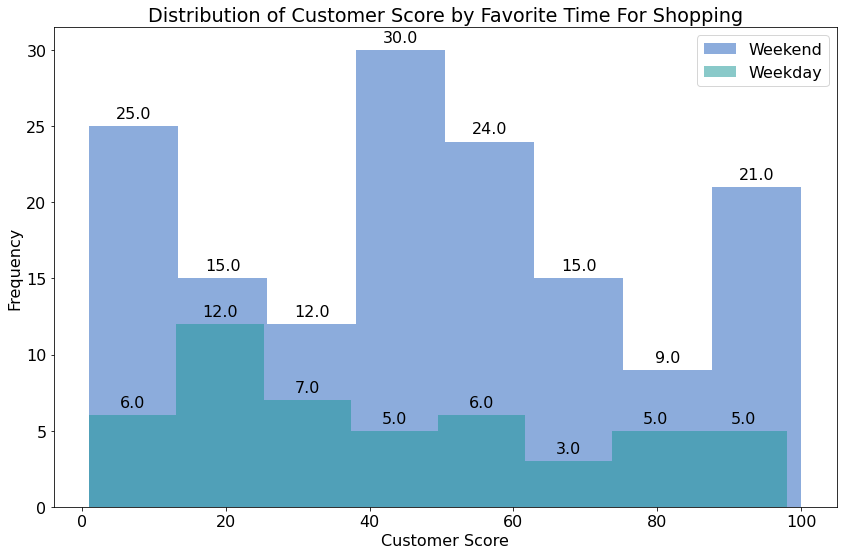

In [16]:
fig, ax = plt.subplots(figsize=(12,8))

nf, bar_labelins_f, patches_f = ax.hist(df[df['favorite_time']=='Weekend']['cust_score'], bins= 8, color = '#1B5ABA', label = 'Weekend', alpha = .5)
nm, bar_labelins_m, patches_m = ax.hist(df[df['favorite_time']=='Weekday']['cust_score'], bins = 8, color = '#159595', label = 'Weekday', alpha = .5)

ax.set_title('Distribution of Customer Score by Favorite Time For Shopping')
ax.set_ylabel('Frequency')
ax.set_xlabel('Customer Score')

for patches in [patches_f, patches_m]:
    for rect in patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space  = 5
        va = 'bottom'
        label = str(np.round(y_value, 3))

        plt.annotate(
            label ,
            (x_value, y_value) ,
            xytext = (0, space) ,
            textcoords = 'offset points' ,
            ha = 'center' ,
            va=va
        )

fig.tight_layout()

plt.legend()

plt.show()

In [17]:
df_income_gender = pd.DataFrame([df[df['favorite_time']=='Weekend']['cust_score'],df[df['favorite_time']=='Weekday']['cust_score']]).transpose()
df_income_gender.columns = ['weekend','weekday']
df_income_gender.describe()

,weekend,weekday
count,151.000000,49.000000
mean,47.966887,43.673469
std,29.320622,27.947412
min,1.000000,1.000000
25%,22.000000,22.000000
50%,46.000000,35.000000
75%,70.000000,67.000000
max,100.000000,98.000000


As we can see that Weekend is more favourite than Weekday for Customers to go shopping. It is showed on both frequencies and distributions. There are 151 customers that go for shopping on Weekend, and 49 customers that go for shopping on Weekday. Customers that shop on Weekend mostly have 46 on their score, while the customers that shop on Weekday mostly have 35 on their score.

It looks like Favourite Time effects the Custommer Score (Purchase Behaviour) in this case. We need to check it later, are there any differences between Favourite Time when considering Customer Score?

Last but not least, let's see, are there any correlation between our numerical variables?

<AxesSubplot:>

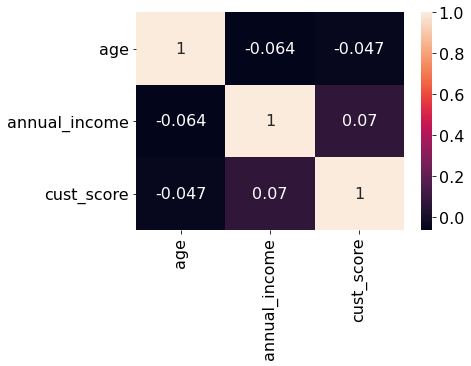

In [18]:
sns.heatmap(df.drop('cust_id', axis=1).corr(), annot= True)

As we can see that there are no correlation on our numerical variables.

Before we test our Hypothesis on the Favourite Time Variable, I want to check our other categorical variable, which is Hometown.

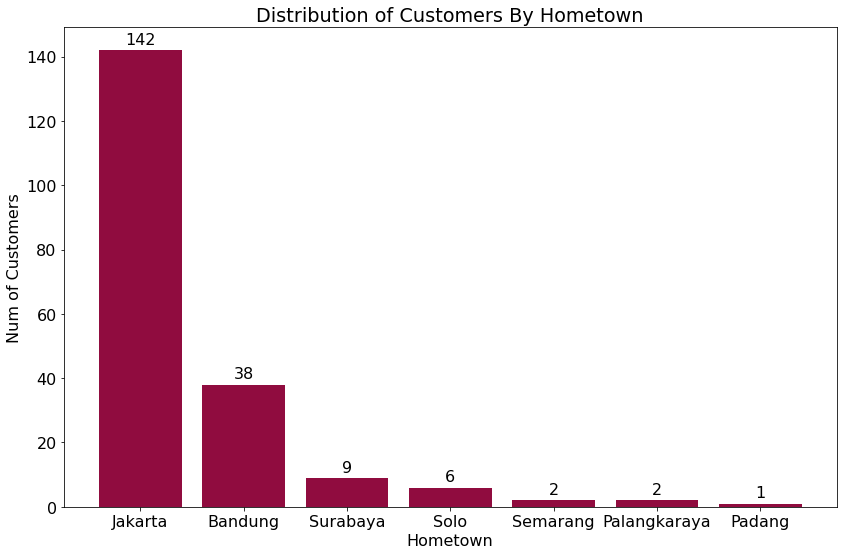

In [19]:
fig, ax = plt.subplots(figsize=(12,8))

rect = ax.bar(df['hometown'].unique(), df['hometown'].value_counts(), color ='#900c3f')

ax.set_title('Distribution of Customers By Hometown')
ax.set_ylabel('Num of Customers')
ax.set_xlabel('Hometown')

ax.bar_label(rect, padding=3)

fig.tight_layout()

plt.show()



We can see that distribution of customers by their hometown is highly imbalance. Mostly our customers live in Jakarta and Bandung. It means that our customers who live in cities other than Jakarta and Bandung do not really make an impact to our Sales.

So, now I think we need to calculate the differences between Favourite Time For Shopping when considering the Customer Score.

First, we prepare our data. We devide our data into 2 groups. The first one is Group of customers that do shopping on Weekend. And the second is Group of customers that do shopping on Weekday.

> *__Null Hypothesis (HO)__ -> People will be equally likely to do shopping in anytime.*

> *__Alternative Hypothesis (HA)__ -> People will be more likely to do shopping on the Weekend.*

In [20]:
group1 = df[df['favorite_time']=='Weekend']['cust_score']
group2 = df[df['favorite_time']=='Weekday']['cust_score']

print('sample size group 1 adalah {}'.format(len(group1)))
print('sample size group 2 adalah {}'.format(len(group2)))

sample size group 1 adalah 151
sample size group 2 adalah 49


In [21]:
t, p = stats.ttest_ind(group1, group2)

sigtxt = ('',' NOT')
print('The groups are{} significantly difference! t({}) = {}, p={}'.format(sigtxt[int(p>.05)],
                                                                         (len(group1)+len(group2))-2,
                                                                         np.round(t,2),
                                                                         np.round(p,6)))

The groups are NOT significantly difference! t(198) = 0.9, p=0.368852


From the t-test, we could conclude that we fail to reject the *Null Hypothesis*, that mean customers's purchase behavior is equal across all days. Neither Weekend nor Weekday do not constitute a difference in customer's purchase behavior.

After we did some exploration in our data, we know that our categorical variables do not constitute any differences in our customer's purchase behavior

# Modeling

In [22]:
from sklearn.cluster import KMeans

### Create Function for ordering the culster numbers

In [23]:
df_result = df[['cust_id','age','annual_income','cust_score']]

In [24]:
def order_cluster(cluster_field_name, target_field_name,df,asc):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=asc).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

## Clustering By Age

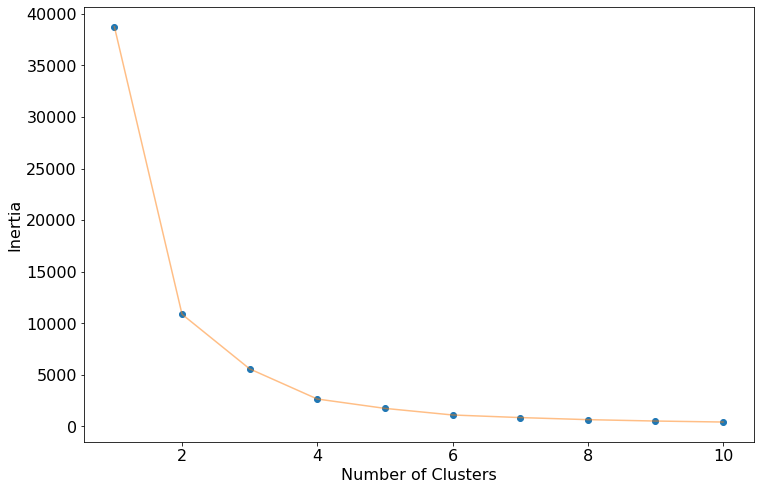

In [25]:
df_age = df_result[['age']]

evaluation = {}

for n in range(1,11):
    model = KMeans(n_clusters = n, 
                   init = 'k-means++',
                   n_init = 10 ,
                   max_iter = 300 ,
                   random_state = 100
                  )
    model.fit(df_age)
    evaluation[n] = model.inertia_

# evaluating the model

plt.figure(1, figsize=(12,8))
plt.plot(list(evaluation.keys()), list(evaluation.values()), 'o')
plt.plot(list(evaluation.keys()), list(evaluation.values()), '-', alpha = 0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [26]:
model = KMeans(n_clusters = 3, 
               init = 'k-means++',
               n_init = 10 ,
               max_iter = 300 ,
               random_state = 100
              )
model.fit(df_age)
df_result['age_cluster'] = model.predict(df_result[['age']])

In [27]:
df_result = order_cluster('age_cluster','age',df_result, False)

In [28]:
df_result.groupby('age_cluster').describe()['age']

,count,mean,std,min,25%,50%,75%,max
age_cluster,,,,,,,,
0,35.0,62.342857,5.460785,54.0,58.5,63.0,67.0,75.0
1,64.0,44.750000,4.710677,37.0,40.0,45.0,49.0,53.0
2,101.0,28.089109,5.632227,18.0,23.0,30.0,32.0,36.0


## Clustering By Customer Score

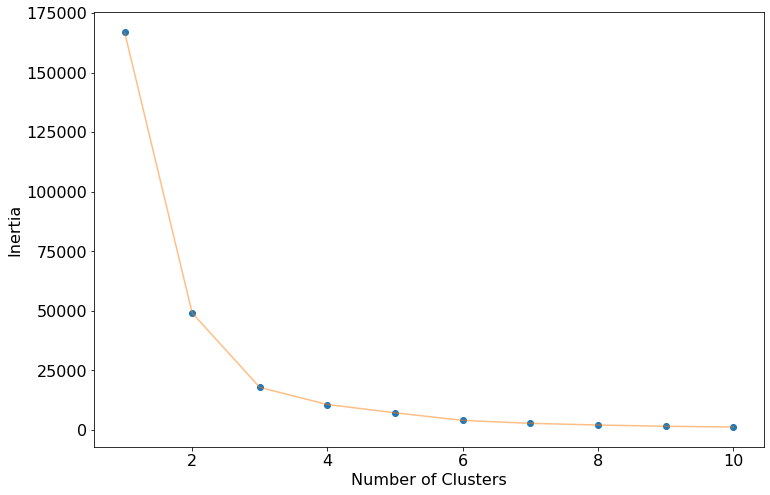

In [29]:
df_cust_score = df_result[['cust_score']]

evaluation = {}

for n in range(1,11):
    model = KMeans(n_clusters = n, 
                   init = 'k-means++',
                   n_init = 10 ,
                   max_iter = 300 ,
                   random_state = 100
                  )
    model.fit(df_cust_score)
    evaluation[n] = model.inertia_

# evaluating the model

plt.figure(1, figsize=(12,8))
plt.plot(list(evaluation.keys()), list(evaluation.values()), 'o')
plt.plot(list(evaluation.keys()), list(evaluation.values()), '-', alpha = 0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [30]:
model = KMeans(n_clusters = 3, 
               init = 'k-means++',
               n_init = 10 ,
               max_iter = 300 ,
               random_state = 100
              )
model.fit(df_cust_score)
df_result['score_cluster'] = model.predict(df_result[['cust_score']])

In [31]:
df_result = order_cluster('score_cluster','cust_score',df_result, True)

In [32]:
df_result.groupby('score_cluster').describe()['cust_score']

,count,mean,std,min,25%,50%,75%,max
score_cluster,,,,,,,,
0,62.0,12.790323,8.770549,1.0,5.0,13.5,21.0,29.0
1,83.0,47.614458,9.393604,31.0,41.5,46.0,56.0,65.0
2,55.0,84.327273,10.521679,67.0,75.0,86.0,92.5,100.0


## Clustering By Annual Income

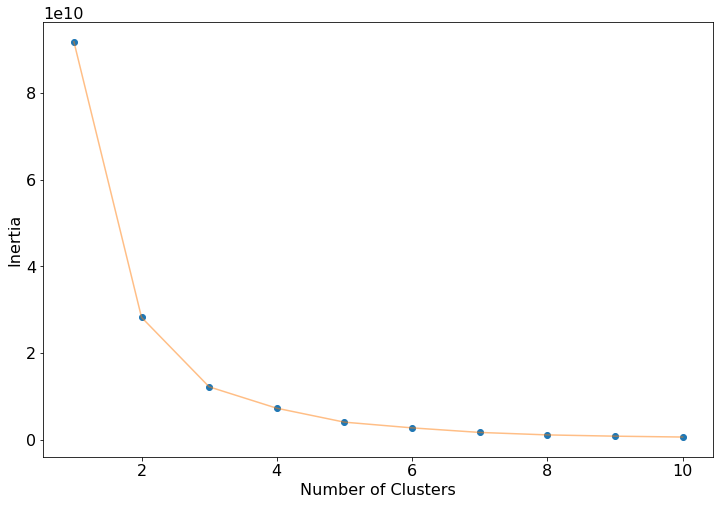

In [33]:
df_annual_income = df_result[['annual_income']]

evaluation = {}

for n in range(1,11):
    model = KMeans(n_clusters = n, 
                   init = 'k-means++',
                   n_init = 10 ,
                   max_iter = 300 ,
                   random_state = 100
                  )
    model.fit(df_annual_income)
    evaluation[n] = model.inertia_

# evaluating the model

plt.figure(1, figsize=(12,8))
plt.plot(list(evaluation.keys()), list(evaluation.values()), 'o')
plt.plot(list(evaluation.keys()), list(evaluation.values()), '-', alpha = 0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [34]:
model = KMeans(n_clusters = 3, 
               init = 'k-means++',
               n_init = 10 ,
               max_iter = 300 ,
               random_state = 100
              )
model.fit(df_annual_income)
df_result['income_cluster'] = model.predict(df_result[['annual_income']])

In [35]:
df_result = order_cluster('income_cluster','annual_income',df_result, True)

In [36]:
df_result.groupby('income_cluster').describe()['annual_income']

,count,mean,std,min,25%,50%,75%,max
income_cluster,,,,,,,,
0,83.0,23202.771084,7930.261478,10000.0,18250.0,23450.0,30000.0,35000.0
1,77.0,50518.701299,6712.764422,38900.0,45000.0,50000.0,56000.0,63000.0
2,40.0,75776.250000,9691.405044,65000.0,67575.0,71000.0,89000.0,90000.0


In [37]:
df_result.head()

,cust_id,age,annual_income,cust_score,age_cluster,score_cluster,income_cluster
0,1,20,20000,1,2,0,0
1,3,18,12350,1,2,0,0
2,5,31,18000,10,2,0,0
3,7,35,20000,6,2,0,0
4,10,34,18500,10,2,0,0


In [38]:
df_result['overall_score'] = df_result['age_cluster'] + df_result['score_cluster'] + df_result['income_cluster']
df_result.head()

,cust_id,age,annual_income,cust_score,age_cluster,score_cluster,income_cluster,overall_score
0,1,20,20000,1,2,0,0,2
1,3,18,12350,1,2,0,0,2
2,5,31,18000,10,2,0,0,2
3,7,35,20000,6,2,0,0,2
4,10,34,18500,10,2,0,0,2


In [39]:
df_result.groupby('overall_score')['age','cust_score','annual_income'].mean()

,age,cust_score,annual_income
overall_score,,,
0,61.500000,16.000000,19087.500000
1,54.590909,24.590909,28590.909091
2,43.340909,28.931818,31222.500000
3,42.307692,47.134615,47310.192308
4,28.764706,56.529412,49897.058824
5,32.125000,79.250000,57043.750000
6,31.636364,82.090909,77281.818182


In [40]:
df_result['overall_score'].value_counts().sort_index()

0     4
1    22
2    44
3    52
4    51
5    16
6    11
Name: overall_score, dtype: int64

- **High Value : 5 - 6**
- **Mid Value  : 3 - 4**
- **Low Value  : 0 - 2**